# HW-3 
### Name: Qihui Du

# Part 1

In [4]:
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as pl
import numpy as np #matrix package
import pandas as pd #dataframe package, similar to dataset in matlab
from pandas.tseries.offsets import MonthEnd
import statsmodels.formula.api as sm
import datetime as dt
import matplotlib.dates as mdates
import math
from scipy.stats import gmean
from IPython.display import HTML

In [5]:
df= pd.read_csv("HW3-ETF Time Series Index Returns (2).csv",index_col=0,skiprows=6,names=['IVV','GOVT','IAU','HYG','EMM'],nrows=119)
df

,IVV,GOVT,IAU,HYG,EMM
2/29/2012,137.3200,24.8200,32.96,92.6425,44.3300
3/30/2012,141.8385,24.6300,32.54,91.7608,42.9450
4/30/2012,140.9044,24.9483,32.46,92.8045,42.2150
5/31/2012,132.4369,25.4463,30.42,89.8148,37.7000
6/29/2012,138.0031,25.3148,31.12,94.0025,39.6216
...,...,...,...,...,...
8/31/2021,548.5669,30.8049,34.53,148.3627,63.6525
9/30/2021,522.8697,30.4750,33.41,147.8133,61.1870
10/29/2021,559.4858,30.4530,33.93,147.3536,61.8428
11/30/2021,555.4079,30.6383,33.68,145.6316,59.3167


In [6]:
# question1
monrt= df.pct_change()
monrt1=monrt.fillna(0)
monrt1+=1
monrt1

,IVV,GOVT,IAU,HYG,EMM
2/29/2012,1.000000,1.000000,1.000000,1.000000,1.000000
3/30/2012,1.032905,0.992345,0.987257,0.990483,0.968757
4/30/2012,0.993414,1.012923,0.997541,1.011374,0.983002
5/31/2012,0.939906,1.019961,0.937153,0.967785,0.893047
6/29/2012,1.042029,0.994832,1.023011,1.046626,1.050971
...,...,...,...,...,...
8/31/2021,1.030222,0.998985,0.999132,1.006094,1.015698
9/30/2021,0.953156,0.989291,0.967564,0.996297,0.961266
10/29/2021,1.070029,0.999278,1.015564,0.996890,1.010718
11/30/2021,0.992711,1.006085,0.992632,0.988314,0.959153


In [7]:
#question2
cum_monrt=monrt1.cumprod()
cum_monrt

,IVV,GOVT,IAU,HYG,EMM
2/29/2012,1.000000,1.000000,1.000000,1.000000,1.000000
3/30/2012,1.032905,0.992345,0.987257,0.990483,0.968757
4/30/2012,1.026103,1.005169,0.984830,1.001749,0.952290
5/31/2012,0.964440,1.025234,0.922937,0.969477,0.850440
6/29/2012,1.004975,1.019936,0.944175,1.014680,0.893788
...,...,...,...,...,...
8/31/2021,3.994807,1.241132,1.047633,1.601454,1.435879
9/30/2021,3.807673,1.227840,1.013653,1.595524,1.380262
10/29/2021,4.074321,1.226954,1.029430,1.590562,1.395055
11/30/2021,4.044625,1.234420,1.021845,1.571974,1.338071


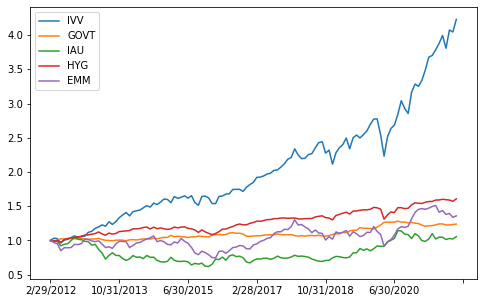

In [8]:
#question3
# cum_monrt.plot(figsize=(12,8))
myplot = cum_monrt.plot(figsize=(8,5))

Explanation: after using same index, excluding IVV, the other four parameters are having relatively steady performance, while the IVV parameter have increased rapidly over the years.


In [9]:
#question4
cov_monrt=monrt1.cov()
cov_monrt

,IVV,GOVT,IAU,HYG,EMM
IVV,0.001419,-0.000124,0.000101,0.000514,0.001202
GOVT,-0.000124,0.000108,0.000160,-0.000022,-0.000094
IAU,0.000101,0.000160,0.001800,0.000232,0.000477
HYG,0.000514,-0.000022,0.000232,0.000349,0.000616
EMM,0.001202,-0.000094,0.000477,0.000616,0.002175


In [10]:
corr_monrt=monrt1.corr()
corr_monrt

,IVV,GOVT,IAU,HYG,EMM
IVV,1.000000,-0.317042,0.063504,0.729582,0.683972
GOVT,-0.317042,1.000000,0.362836,-0.113884,-0.193897
IAU,0.063504,0.362836,1.000000,0.292634,0.241157
HYG,0.729582,-0.113884,0.292634,1.000000,0.706873
EMM,0.683972,-0.193897,0.241157,0.706873,1.000000


From the correlation matrix, we can see the correlations between HYG/IVV and HYG/EEM and IVV/EEM are both higher than 0.7, which indicates strong correlation. Also, IVV/GOV has a relatively moderate negative correlation

In [11]:
sd_monrt=np.sqrt(np.diagonal(cov_monrt))
sd_monrt

array([0.03767279, 0.0103992 , 0.04242598, 0.0186888 , 0.04663273])

In [12]:
annual_sd=np.sqrt(12)*sd_monrt
annual_sd

array([0.13050237, 0.03602387, 0.14696789, 0.06473991, 0.1615405 ])

Explanation: we can say that relatively, GOVT&HYG have small volatilities while IVV ,IAU and EEM had larger volitilities annually.

# Part 2

In [13]:
#compute the annual covariance matrix 
cov_annualrt= 12*cov_monrt
cov_annualrt

,IVV,GOVT,IAU,HYG,EMM
IVV,0.017031,-0.001490,0.001218,0.006164,0.014419
GOVT,-0.001490,0.001298,0.001921,-0.000266,-0.001128
IAU,0.001218,0.001921,0.021600,0.002784,0.005725
HYG,0.006164,-0.000266,0.002784,0.004191,0.007393
EMM,0.014419,-0.001128,0.005725,0.007393,0.026095


In [14]:
#check the eigenvalue
evalues=np.linalg.eig(cov_annualrt)
evalues

(array([0.04112722, 0.02059411, 0.00617218, 0.00139172, 0.00092951]),
 array([[-0.53268285,  0.30207145, -0.74036914, -0.24226697,  0.1347667 ],
        [ 0.02907375, -0.12450392,  0.02625596,  0.23622881,  0.96289151],
        [-0.28785588, -0.93548195, -0.15434579, -0.10727672, -0.08174106],
        [-0.26115874,  0.01693128, -0.14824913,  0.92939805, -0.2138946 ],
        [-0.75122487,  0.13356074,  0.63668181, -0.10106251,  0.04738534]]))

Explanantion: We can see that all eigen values are positive.

## question a): compute the GMVP

In [15]:
#i. check the weights sum to one&#ii.calculate Wg using (2.50)
# calculate the inverse of covariance matrix
Σ= np.linalg.inv(cov_annualrt)
print(Σ)

[[ 161.85202796   93.13251168   15.3440799  -171.38566726  -40.21968908]
 [  93.13251168 1038.45645639  -98.09039121  -64.73921973   33.30283753]
 [  15.3440799   -98.09039121   63.82588779  -48.06415301  -13.10727353]
 [-171.38566726  -64.73921973  -48.06415301  675.11169493  -88.80664242]
 [ -40.21968908   33.30283753  -13.10727353  -88.80664242   90.01844476]]


In [16]:
a=np.array([1,1,1,1,1])
b=a.transpose()
wg=np.divide(np.dot(Σ,a),np.dot(np.dot(b,Σ),a))
Wg_n=pd.Series([ 0.04645838,  0.79277242, -0.06336394,  0.23901634, -0.0148832 ],index=df.columns)
print(Wg_n)
print(f"sum of weights:{round(wg.sum(),4)}")

IVV     0.046458
GOVT    0.792772
IAU    -0.063364
HYG     0.239016
EMM    -0.014883
dtype: float64
sum of weights:1.0


Explanation: We can see from the weights, US Treasury Bond ETF has the greatest weight and it's intuitive, for Treasury bonds are always considered low-risk investment and will definitely contribute most the minimization of the variance.

iii. Intuitively the global minimum-variance portfolio will hold the portfolio with the least risks and variance, however, it cannot only hold the lowest-risk asset class because first of all, GMVP is a special point for MVP including multiple assets, so it must have two or more assets; moreover, the undiversified risk is set by the market however, the divesifiable risk can be reduced when N grows, as well as the expected return. So it's not true for GMVP to hold only the lowest-risk asset.

In [17]:
#iv.calculate variance&std using (2.55)
var_GMVP=np.dot(Wg_n.T,np.dot(cov_annualrt,Wg_n))
var_GMVP
std_GMVP=math.sqrt(var_GMVP)
std_GMVP
print ("the annualized variance is "+str(var_GMVP))
print ("the annualized std is "+str(std_GMVP))

the annualized variance is 0.0007911409319648295
the annualized std is 0.028127227591158526


## question b): compute a MVP

In [18]:
#a&b.compute A,B,C,D,λ1,λ2, setting the R_p_bar=0.05
R_p_bar=0.05
R_bar=pd.DataFrame([0.06,0.016,0.03,0.032,0.071],index=df.columns)          
R_bar

,0
IVV,0.060
GOVT,0.016
IAU,0.030
HYG,0.032
EMM,0.071


In [19]:
R_bar_t=pd.DataFrame.transpose(R_bar)
R1=R_bar_t.to_numpy()
R2=R_bar.to_numpy()
A=np.dot(np.dot(R1,Σ),R2)
print("A=",str(A[0][0]))
i=np.array([1,1,1,1,1])
ii=i.transpose()
B=np.dot(np.dot(R1,Σ),ii)
print("B=",str(B[0]))
C=np.dot(np.dot(i,Σ),ii)
print("C=",str(C))
D=A*C-B**2
print("D=",str(D[0][0]))
λ1=(C*R_p_bar-B)/D
λ2=(A-B*R_p_bar)/D
print("λ1=",str(λ1[0][0]))
print("λ2=",str(λ2[0][0]))

A= 0.6478599730929251
B= 25.485672890582613
C= 1263.9972975692979
D= 169.37373250699784
λ1= 0.22266848247159035
λ2= -0.003698470017541382


In [20]:
#c.calculate MVP using(2.43), check weights sum to 1
W_mvp=pd.Series(np.diagonal(λ1*(np.dot(Σ,R2))+λ2*(np.dot(Σ,ii))),index=df.columns)
print(W_mvp)
print(f"sum of weights:{round(W_mvp.sum(),4)}")

IVV     0.522435
GOVT    0.647826
IAU     0.028415
HYG    -0.552366
EMM     0.353689
dtype: float64
sum of weights:1.0


In [21]:
#d.calculate variance&std. using(2.47)
var_mvp=(A-2*B*R_p_bar+C*(R_p_bar**2))/D
std_mvp=math.sqrt(var_mvp)
print("the variance of MVP is ",str(var_mvp[0][0]))
print("the std of MVP is ",str(std_mvp))

the variance of MVP is  0.007434954106038137
the std of MVP is  0.08622617993416


In [22]:
#e.characterize differences between this portfolio and GMVP
pd.concat([Wg_n,W_mvp,R_bar],axis=1).set_axis(['GMVP','MVP','R_bar'],axis=1)

,GMVP,MVP,R_bar
IVV,0.046458,0.522435,0.060
GOVT,0.792772,0.647826,0.016
IAU,-0.063364,0.028415,0.030
HYG,0.239016,-0.552366,0.032
EMM,-0.014883,0.353689,0.071


Explanations: under this portfolio, the expected return rate is higher than the GMVP, therefore we should transfer the low-risk asset like GOVT to riskier ones, like the EEM and IAU.

## question c): mutual fund

In [23]:
#a.compute 'mutual fund' using(2.57)& teat for the same weight as MVP
bracket1=np.dot(Σ,R2)
bracket2=np.dot(np.dot(i,Σ),R2)
bracket=np.divide(bracket1,bracket2)
bracket
w1=λ1*B*bracket+λ2*C*wg
W=pd.Series(np.diagonal(w1),index=df.columns)
pd.concat([W,W_mvp],axis=1).set_axis(['MF_MVP','MVP'],axis=1)

,MF_MVP,MVP
IVV,0.522435,0.522435
GOVT,0.647826,0.647826
IAU,0.028415,0.028415
HYG,-0.552366,-0.552366
EMM,0.353689,0.353689


From the above code, we see that we arrive at the exact portfolio for part (c) using the mutual fund theorem as in part (b) where we calculated the MVP directly.

Conclusion: Once we know that the whole minimum-variance frontier can be constructed from two mutual funds, we can choose any two minimum-variance portfolios on the frontier and represent all other minimum-variance portfolios as combinations of these two funds, and when choosing GMVP as one of the funds will have the same return. 

## question d): compute the MSRP

In [24]:
#a&b: set R_f=0.005,δR=0.045, calculate weights using(2.61)
a=np.array([1,1,1,1,1])
iii=np.transpose(a)
sub=np.subtract(R2,0.005*iii)
sub1=sub.transpose()
E=np.dot(np.dot(sub1,Σ),sub)
lambda_1=0.045/E[0][0]
W=lambda_1*np.dot(Σ,sub)
W_msrp=pd.Series(np.diagonal(W),index=df.columns)
print(W_msrp)
W_rf=1-W_msrp.sum()
print("The weight for riskfree asset is ",str(W_rf))
#W_rf=pd.Series('R_f':1-W_msrp.sum(),index=['R_f'])

IVV     0.320912
GOVT    1.541294
IAU    -0.085022
HYG     0.108825
EMM     0.145195
dtype: float64
The weight for riskfree asset is  -1.0312045118826871


In [25]:
#c.interpretation for difference between d)&c)
pd.DataFrame([W_msrp,W_mvp],['MSRP','MVP']).T

,MSRP,MVP
IVV,0.320912,0.522435
GOVT,1.541294,0.647826
IAU,-0.085022,0.028415
HYG,0.108825,-0.552366
EMM,0.145195,0.353689


Explanation: in the presence of one riskless asset, investors would dilute their risky asset by holding more of the riskless aseets, in this term is 'GOVT'.

In [26]:
#d.compute the variance and std. of the MSRP
var_msrp=lambda_1**2*E[0][0]
std_msrp=math.sqrt(var_msrp)
print("the variance of the MSRP is ",str(var_msrp))
print("the std. of the MSRP is ",str(std_msrp))     

the variance of the MSRP is  0.0047691588557805
the std. of the MSRP is  0.06905909683582967


In [27]:
#e.confirm the total expected return is the same as MVP in b)
R_p_msrp=0.005+np.dot(sub1,W)
print(f"MSRP expected return:{round(R_p_msrp[0][0],7)}")

MSRP expected return:0.05


We can see the return for MSRP is the same as MVP return in b), which is also 0.05.

In [28]:
print(f"MSRP annual std:{np.round(std_msrp,7)}\n"
      f"MVP annual std:{np.round(std_mvp,7)}")

MSRP annual std:0.0690591
MVP annual std:0.0862262


As we can see, the annualized std. for MSRP is smaller than that of MVP, that's because when having riskless asset in the portfolio, investors would have less volatility in optimizing their asset allocation, and have more effcient solutions. 

## Extra Credit

In [29]:
er_vector=np.arange(0.021,0.07,0.001)
er_vector
def fncA(r,V):
    A=r.transpose()@V@r
    return A
def fncB(r,V,array):
    B=r.transpose()@V@array
    return B
def fncC(array,V):
    C=array.transpose()@V@array
    return C
def fncD(A,B,C):
    D=A*C-B**2
    return D
def fncλ1(B,C,D,ert):
    λ1=(C*ert-B)/D
    return λ1
def fncλ2(A,B,D,ert):
    λ2=(A-B*ert)/D
    return λ2
def fncVAR(λ1,λ2,ert):
    VAR=λ1*ert+λ2
    return VAR

(0.0, 0.1)

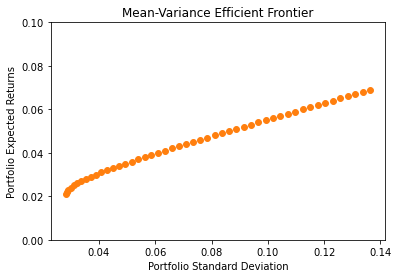

In [30]:
stdList=[]
er_vector=np.arange(0.021,0.07,0.001)
for ert in er_vector:
    myA=fncA(R2,Σ)
    myB=fncB(R2,Σ,a)
    myC=fncC(a,Σ)
    myD=fncD(myA,myB,myC)
    lambda1=fncλ1(myB,myC,myD,ert)
    lambda2=fncλ2(myA,myB,myD,ert)
    myvar=fncVAR(lambda1,lambda2,ert)
    mystd=np.sqrt(myvar)
    stdList.append(mystd)
pl.scatter(x=stdList, y=er_vector,c='tab:orange',s=35,alpha=1)
pl.xlabel("Portfolio Standard Deviation")
pl.ylabel("Portfolio Expected Returns")
pl.title('Mean-Variance Efficient Frontier'),
pl.ylim(0,0.1)


In [31]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')